<a href="https://colab.research.google.com/github/slmsshk/Data_Science-_Dummy/blob/main/Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

In [12]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Hamspam.csv",encoding = "ISO-8859-1")

In [20]:
data.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,1,okmail: Dear Dave this is your final notice to...


### Aproach 1

In [21]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [22]:
data['text'] = data.text.apply(clean)
data.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [23]:

#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

to      2243
i       2228
you     2118
a       1437
the     1323
u       1298
and      965
is       892
in       886
me       789
my       753
for      709
your     659
of       619
it       616
call     577
have     575
on       534
that     509
are      490
dtype: int64

In [24]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

u       1298
call     577
im       462
ur       389
get      384
å£       293
dont     287
go       282
ok       278
free     275
know     257
like     244
ill      239
got      239
good     236
come     228
time     214
day      203
love     197
send     191
dtype: int64

In [26]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,1,0.000089
1,aah,3,0.000266
2,aaniye,1,0.000089
3,aaooooright,1,0.000089
4,aathilove,3,0.000266
...,...,...,...
6815,ûªscool,1,0.000089
6816,ûªve,2,0.000177
6817,ûïharry,1,0.000089
6818,ûïits,1,0.000089


In [29]:

#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [31]:
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39
5,dont know,38
6,good morning,30
7,po box,28
8,call landline,25
9,take care,24


[Text(0, 0, 'please call'),
 Text(0, 0, 'call later'),
 Text(0, 0, 'ill call'),
 Text(0, 0, 'let know'),
 Text(0, 0, 'sorry ill'),
 Text(0, 0, 'dont know'),
 Text(0, 0, 'good morning'),
 Text(0, 0, 'po box'),
 Text(0, 0, 'call landline'),
 Text(0, 0, 'take care'),
 Text(0, 0, 'im going'),
 Text(0, 0, 'guaranteed call'),
 Text(0, 0, 'new year'),
 Text(0, 0, 'prize guaranteed'),
 Text(0, 0, 'ok lor'),
 Text(0, 0, 'pls send'),
 Text(0, 0, 'every week'),
 Text(0, 0, 'send stop'),
 Text(0, 0, 'good night'),
 Text(0, 0, 'im gonna')]

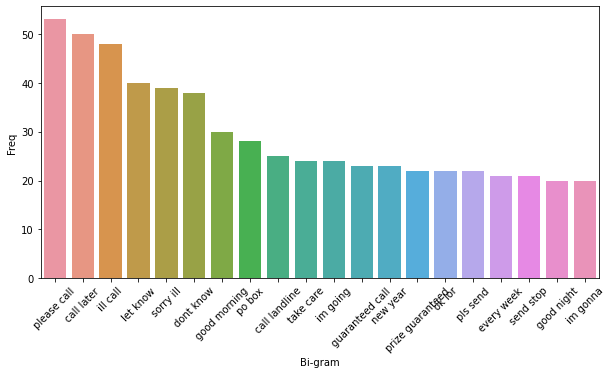

In [32]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])b


In [33]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [34]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

[Text(0, 0, 'ill call later'),
 Text(0, 0, 'sorry ill call'),
 Text(0, 0, 'prize guaranteed call'),
 Text(0, 0, 'call land line'),
 Text(0, 0, 'happy new year'),
 Text(0, 0, 'private account statement'),
 Text(0, 0, 'guaranteed call land'),
 Text(0, 0, 'call identifier code'),
 Text(0, 0, 'land line claim'),
 Text(0, 0, 'draw shows prize'),
 Text(0, 0, 'shows prize guaranteed'),
 Text(0, 0, 'identifier code expires'),
 Text(0, 0, 'pls send message'),
 Text(0, 0, 'account statement shows'),
 Text(0, 0, 'statement shows unredeemed'),
 Text(0, 0, 'camcorder reply call'),
 Text(0, 0, 'cant pick phone'),
 Text(0, 0, 'pick phone right'),
 Text(0, 0, 'phone right pls'),
 Text(0, 0, 'right pls send')]

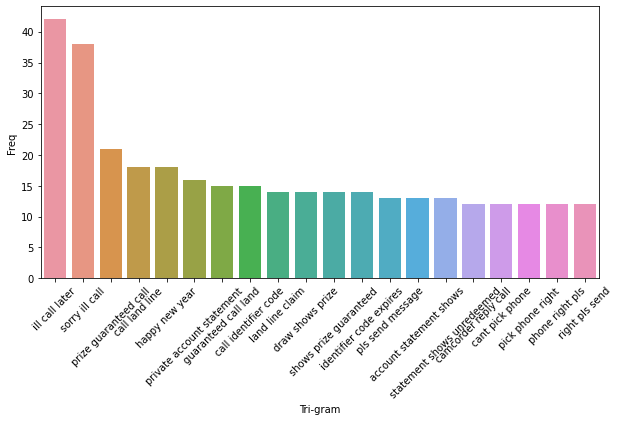

In [35]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [36]:
string_Total = " ".join(data["text"])

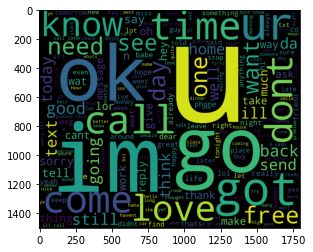

In [37]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [38]:
def split_into_words(i):
    return (i.split(" "))


In [39]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [48]:
email_test

,type,text
1581,1,want get laid tonight want real dogging locati...
1659,0,yup studying surfing lor im e lazy mode today
4900,1,talk sexy make new friends fall love worlds di...
5402,0,yes please leave leave
5287,0,alrite
...,...,...
4872,0,people see msgs think iam addicted msging wron...
2309,0,hi neva worry bout da truth coz truth lead ur ...
1118,0,would ip address test considering computer isn...
5027,0,want send something sell fast k easy money


In [40]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    



In [41]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 8175)

In [42]:
all_emails_matrix

<5559x8175 sparse matrix of type '<class 'numpy.int64'>'
	with 45905 stored elements in Compressed Sparse Row format>

In [43]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(1668, 8175)

In [44]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%



In [45]:
accuracy_test_m

0.9670263788968825

In [50]:

# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(email_test['type'], test_pred_m),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(email_test['type'], test_pred_m))



Accuracy: 97.0 %
---------------
Confusion matrix
---------------
[[1388   39]
 [  16  225]]


### Approach 2

In [13]:
# performing labelencoding for class frature
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['type'] = labelencoder.fit_transform(data['type'])

# creating document
My_document = list()
for i in data['text'][:]:
    My_document.append(i)
    
print(data)
print(My_document)

      type                                               text
0        0  Hope you are having a good week. Just checking in
1        0                            K..give back my thanks.
2        0        Am also doing in cbe only. But have to pay.
3        1  complimentary 4 STAR Ibiza Holiday or å£10,000...
4        1  okmail: Dear Dave this is your final notice to...
...    ...                                                ...
5554     0  You are a great role model. You are giving so ...
5555     0  Awesome, I remember the last time we got someb...
5556     1  If you don't, your prize will go to another cu...
5557     1  SMS. ac JSco: Energy is high, but u may not kn...
5558     0                    Shall call now dear having food

[5559 rows x 2 columns]
['Hope you are having a good week. Just checking in', 'K..give back my thanks.', 'Am also doing in cbe only. But have to pay.', 'complimentary 4 STAR Ibiza Holiday or å£10,000 cash needs your URGENT collection. 09066364349 NOW from

In [14]:
#CountVectorizer will convert all the text into lowercase, will remove all the punctuations and all the stopwords.

from sklearn.feature_extraction.text import CountVectorizer
count_vector =CountVectorizer()

# CountVectorizer on the documents
count_vector.fit(My_document)
count_vector.get_feature_names()


document_freq = count_vector.transform(My_document).toarray()

print(count_vector.get_feature_names())

# creating frequency matrix

frequency_ofwords = pd.DataFrame(document_freq, columns= count_vector.get_feature_names() )



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [16]:
from sklearn.naive_bayes import MultinomialNB   # imports Naive Bayes classifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

data_train, data_test, datatarget_train, datatarget_test = train_test_split(frequency_ofwords, data['type'], test_size=0.3)

In [17]:
naive_bayes = MultinomialNB()
naive_bayes.fit(data_train, datatarget_train)

MultinomialNB()

In [18]:
predictions = naive_bayes.predict(data_test)

In [19]:

# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(datatarget_test, predictions),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(datatarget_test, predictions))



Accuracy: 98.0 %
---------------
Confusion matrix
---------------
[[1425   15]
 [  18  210]]
